<a href="https://colab.research.google.com/github/RInterested/Jupyter-Notebooks/blob/master/Regression_and_Plots_in_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**REGRESSION IN PYTHON:**

Information found [here](https://www.statsmodels.org/dev/example_formulas.html), [here](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html) and [here](https://songhuiming.github.io/pages/2017/01/21/linear-regression-in-py).

The plots are by and large thanks to [this post](https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c).

In [1]:
# Math packages:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scipystats      # SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem for mathematics, science, and engineering.

# Seaborn is a Python data visualization library based on matplotlib. 
import seaborn as sns

# pandas is mainly a package to handle and operate directly on data:
import pandas as pd

# statsmodels is doing "traditional" statistics and econometrics: 
# http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Python_StatsModels.pdf
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
import statsmodels.api as sm              
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats
from   statsmodels.graphics.regressionplots import *
from   statsmodels.sandbox.regression.predstd import wls_prediction_std
from   statsmodels.formula.api import ols

# sklearn:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Module for iterative processes (loops, tabulations, counts):
import itertools
from   itertools import chain, combinations

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importing trees dataset from Git Hub:

import io
import requests

url = "https://raw.githubusercontent.com/RInterested/datasets/gh-pages/trees.csv"
contents = requests.get(url).content
trees = pd.read_csv(io.StringIO(contents.decode('utf-8')))

trees.head()

,Unnamed: 0,Girth,Height,Volume
0,1,8.3,70,10.3
1,2,8.6,65,10.3
2,3,8.8,63,10.2
3,4,10.5,72,16.4
4,5,10.7,81,18.8


In [0]:
trees = trees[['Girth','Height','Volume']]

In [4]:
trees.shape # 31 examples with 3 features (columns)

(31, 3)

In [5]:
trees.describe()

,Girth,Height,Volume
count,31.000000,31.000000,31.000000
mean,13.248387,76.000000,30.170968
std,3.138139,6.371813,16.437846
min,8.300000,63.000000,10.200000
25%,11.050000,72.000000,19.400000
50%,12.900000,76.000000,24.200000
75%,15.250000,80.000000,37.300000
max,20.600000,87.000000,77.000000


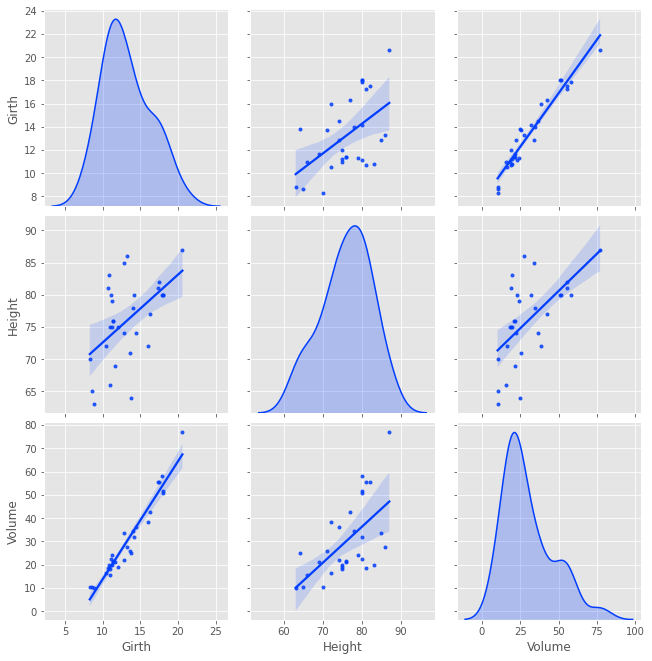

In [6]:
plt.style.use('ggplot')
sns.set_palette("bright")
sns.pairplot(trees, kind="reg", diag_kind="kde", markers=".", height=3)

In [7]:
# The following system returns the intercept:
reg = ols(formula = "Volume ~ Girth + Height", data = trees).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     255.0
Date:                Fri, 29 May 2020   Prob (F-statistic):           1.07e-18
Time:                        02:32:43   Log-Likelihood:                -84.455
No. Observations:                  31   AIC:                             174.9
Df Residuals:                      28   BIC:                             179.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -57.9877      8.638     -6.713      0.0

Compare to the output of R:

```
> reg = lm(Volume ~ Girth + Height, trees)
> summary(reg)

Call:
lm(formula = Volume ~ Girth + Height, data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
Girth         4.7082     0.2643  17.816  < 2e-16 ***
Height        0.3393     0.1302   2.607   0.0145 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16
```

In [8]:
# The sm.OLS() on the other hand requires the specific sm.add_constant() to get an intercept.
# The following example includes only the first 20 rows or examples:

linmodel = sm.OLS(trees['Volume'][0:20], sm.add_constant(trees[['Girth', 'Height']][0:20])).fit()
print(linmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     64.58
Date:                Fri, 29 May 2020   Prob (F-statistic):           1.14e-08
Time:                        02:32:43   Log-Likelihood:                -41.788
No. Observations:                  20   AIC:                             89.58
Df Residuals:                      17   BIC:                             92.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.8057      5.649     -6.339      0.0

In [9]:
# ... without the tweak, there is no intercept...
linmodel = sm.OLS(trees['Volume'][0:20], trees[['Girth', 'Height']][0:20]).fit()
print(linmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Volume   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              298.2
Date:                Fri, 29 May 2020   Prob (F-statistic):                    1.59e-14
Time:                        02:32:43   Log-Likelihood:                         -53.918
No. Observations:                  20   AIC:                                      111.8
Df Residuals:                      18   BIC:                                      113.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Compare to:

```
> linmodel = lm(Volume[0:20] ~ Girth[0:20] + Height[0:20], trees)
> summary(linmodel)

Call:
lm(formula = Volume[0:20] ~ Girth[0:20] + Height[0:20], data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2225 -1.3985 -0.0437  0.8788  5.7161 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -35.8057     5.6488  -6.339 7.41e-06 ***
Girth[0:20]    2.8415     0.3316   8.570 1.41e-07 ***
Height[0:20]   0.3204     0.0754   4.249 0.000541 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.121 on 17 degrees of freedom
Multiple R-squared:  0.8837,	Adjusted R-squared:   0.87 
F-statistic: 64.58 on 2 and 17 DF,  p-value: 1.143e-08
```

In [10]:
print('Parameters: ', linmodel.params)
print('Standard errors: ', linmodel.bse)
print('Predicted values: ', linmodel.predict())

Parameters:  Girth     2.126571
Height   -0.049434
dtype: float64
Standard errors:  Girth     0.555692
Height    0.085132
dtype: float64
Predicted values:  [14.19016926 15.07530988 15.59949181 18.76975781 18.75016727 18.86395665
 20.1296465  19.68474175 19.65022954 20.11005595 20.12497761 20.4859363
 20.4859363  21.46994464 21.81131278 23.77466057 23.23088809 24.03208265
 25.62421898 26.18291312]


In [11]:
# Importing mtcars dataset from Git Hub:

import io
import requests

url = "https://raw.githubusercontent.com/RInterested/datasets/gh-pages/mtcars.csv"
contents = requests.get(url).content
mtcars = pd.read_csv(io.StringIO(contents.decode('utf-8')))

mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
print(mtcars.describe())

             mpg        cyl        disp  ...         am       gear     carb
count  32.000000  32.000000   32.000000  ...  32.000000  32.000000  32.0000
mean   20.090625   6.187500  230.721875  ...   0.406250   3.687500   2.8125
std     6.026948   1.785922  123.938694  ...   0.498991   0.737804   1.6152
min    10.400000   4.000000   71.100000  ...   0.000000   3.000000   1.0000
25%    15.425000   4.000000  120.825000  ...   0.000000   3.000000   2.0000
50%    19.200000   6.000000  196.300000  ...   0.000000   4.000000   2.0000
75%    22.800000   8.000000  326.000000  ...   1.000000   4.000000   4.0000
max    33.900000   8.000000  472.000000  ...   1.000000   5.000000   8.0000

[8 rows x 11 columns]


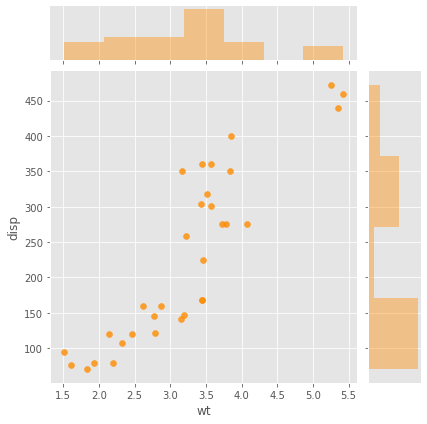

In [13]:
plt.style.use('ggplot')
sns.jointplot(x=mtcars.wt, y=mtcars.disp, alpha=0.8, color = "darkorange", height=6)  

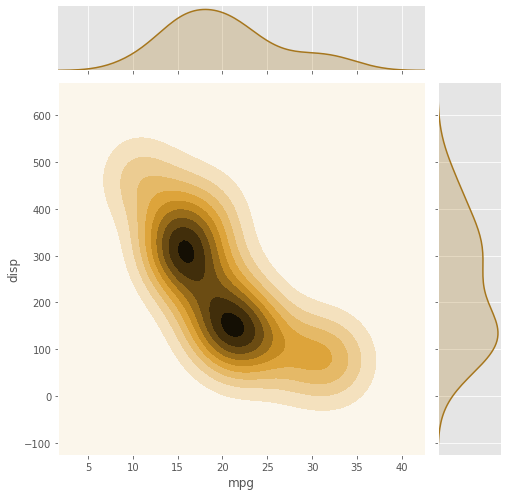

In [14]:
sns.set_palette("Dark2_r")
sns.jointplot(x=mtcars.mpg, y=mtcars.disp, kind='kde', height=7)

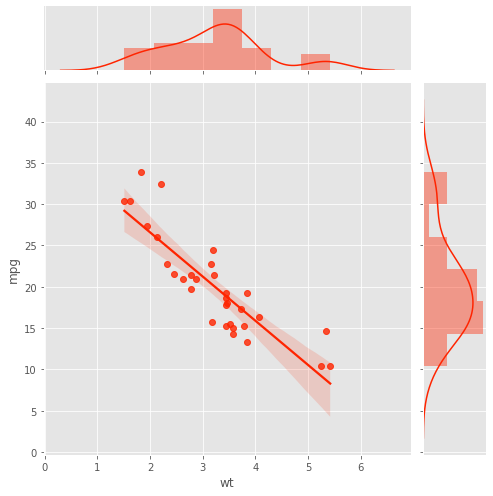

In [15]:
plt.style.use('ggplot')
sns.set_palette("autumn")
sns.jointplot(x=mtcars.wt, y=mtcars.mpg, kind='reg', height=7)

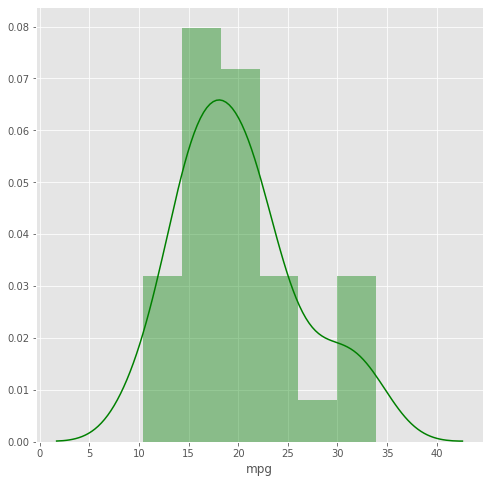

In [16]:
f, ax = plt.subplots(figsize=(8, 8))
sns.distplot(mtcars.mpg, kde=True, color = "g")

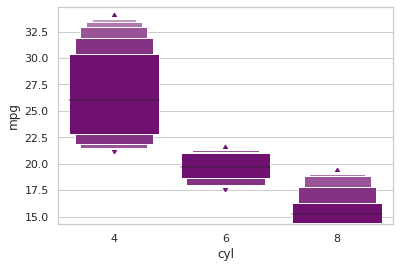

In [17]:
figsize=(6, 6)
sns.set(style="whitegrid")  
sns.boxenplot(x = "cyl", y = "mpg", color = "purple", scale = "linear", data = mtcars)  

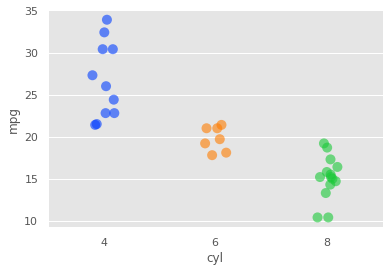

In [18]:
figsize=(7, 7)
plt.style.use('ggplot')
sns.set_palette("bright")
sns.stripplot(x="cyl", y="mpg", data=mtcars, alpha = 0.6, size = 10)

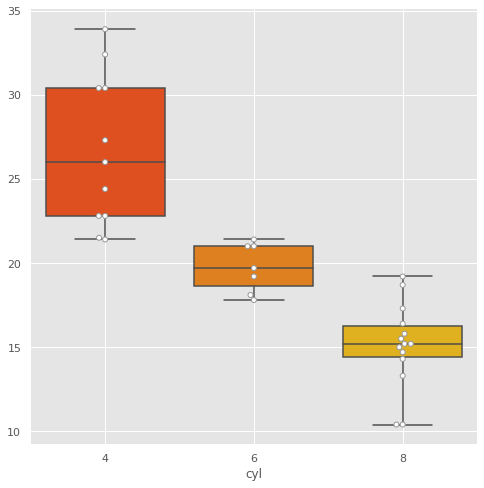

In [19]:
f, ax = plt.subplots(figsize=(8, 8))
plt.style.use('ggplot')

sns.boxplot(x="cyl", y="mpg", data=mtcars,  
            whis=[0,100], palette='autumn')  
  
# Add in points to show each observation  
sns.swarmplot(x="cyl", y="mpg", data=mtcars,  
              size=5, color="white", linewidth=1)  
  
# Tweak the visual presentation  
ax.xaxis.grid(True)  
ax.set(ylabel="")  
sns.despine(trim=True, left=True)  

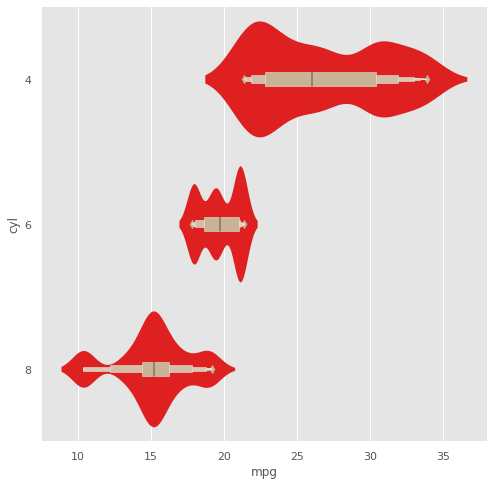

In [20]:
f, ax = plt.subplots(figsize=(8, 8))
plt.style.use('ggplot')
sns.violinplot(y='cyl', x='mpg',data=mtcars, color='red', scale='width', bw=0.3, orient ='h', linewidth=0)
sns.boxenplot(y='cyl', x='mpg', data=mtcars, color="tan", width=.1, orient='h')

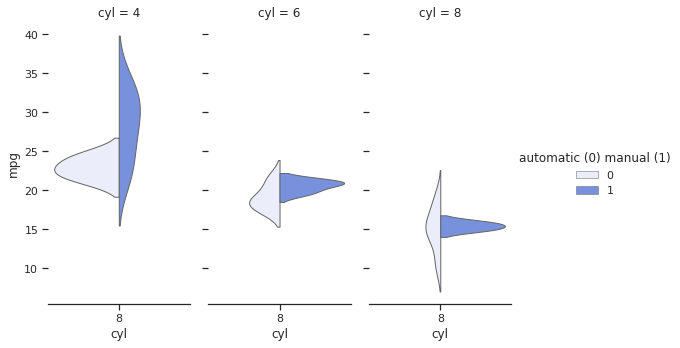

In [21]:
# The following line gets rid of a useless warning in this cell:
%%capture  --no-display 
sns.set(style="ticks", palette='coolwarm')
g = sns.FacetGrid(mtcars, col="cyl", height =5, aspect=.5)
g = g.map(sns.violinplot, "cyl", "mpg", "am", inner=None, linewidth=1, 
scale="area", split=True, width=0.75).despine(left=True).add_legend(title="automatic (0) manual (1)")

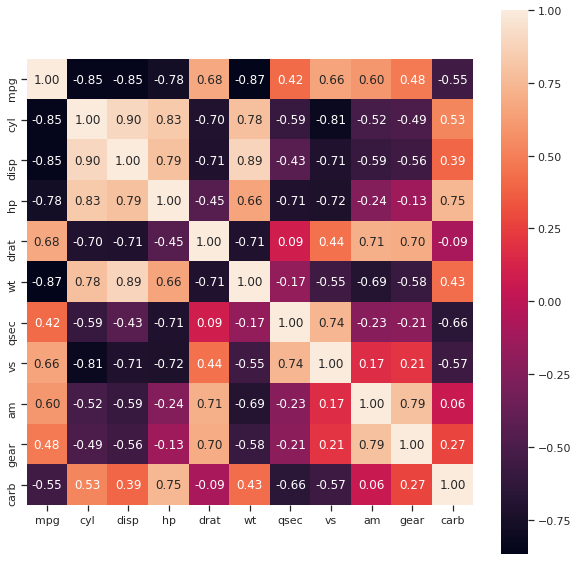

In [22]:
corrmat = mtcars.corr()
f, ax = plt.subplots(figsize=(10, 10))
# sns.heatmap(corrmat, vmin = -0.9, vmax=0.95, square = True, annot= True, fmt='.2f', cmap='summer' )
sns.heatmap(corrmat, annot=True, fmt='0.2f', square=True)

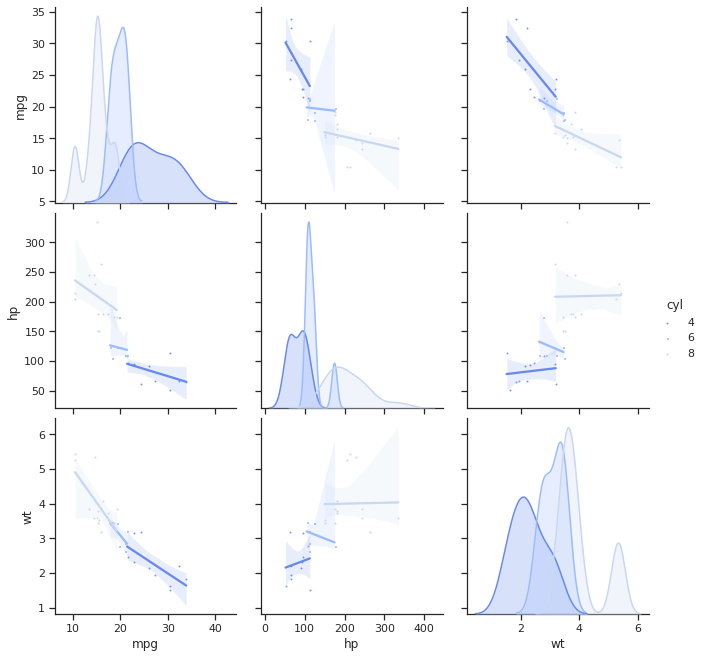

In [23]:
d = mtcars[['mpg','cyl','hp','wt']]
sns.pairplot(d, kind="reg", diag_kind="kde", markers=["o", "s", "D"], hue="cyl", plot_kws=dict(scatter_kws=dict(s=1)), height=3)

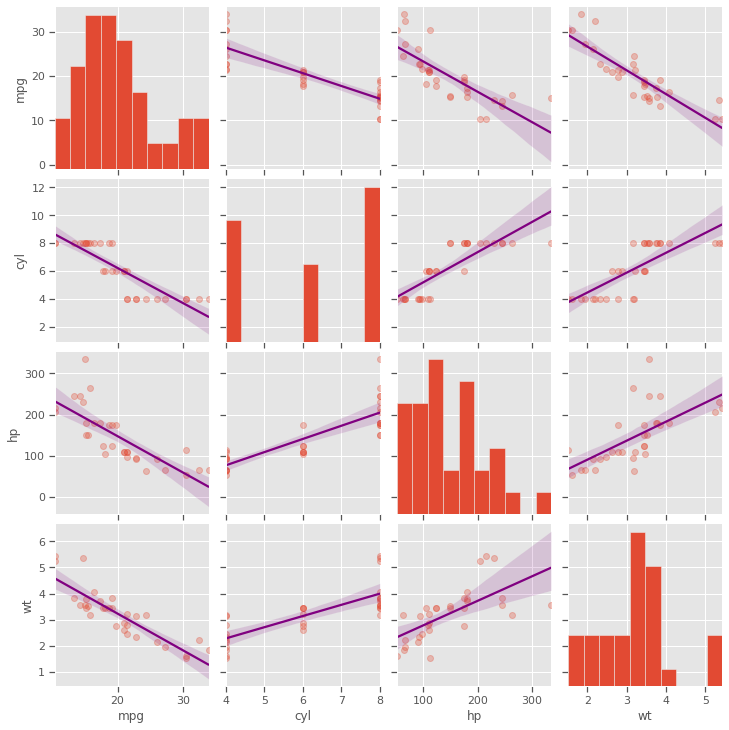

In [24]:
plt.style.use('ggplot')
plt.rcParams["patch.force_edgecolor"] = True
g = sns.pairplot(d, kind='reg', plot_kws={'line_kws':{'color':'purple'}, 'scatter_kws': {'alpha': 0.3}})

In [25]:
# From https://stackoverflow.com/a/50733691/4089351)
reg = ols('mpg ~ C(cyl) + wt', data=mtcars).fit() 
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     48.08
Date:                Fri, 29 May 2020   Prob (F-statistic):           3.59e-11
Time:                        02:33:05   Log-Likelihood:                -73.311
No. Observations:                  32   AIC:                             154.6
Df Residuals:                      28   BIC:                             160.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      33.9908      1.888     18.006      

Compare to the R output:

```
> m = lm(mpg ~ factor(cyl) + wt, mtcars)
> summary(m)

Call:
lm(formula = mpg ~ factor(cyl) + wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5890 -1.2357 -0.5159  1.3845  5.7915 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   33.9908     1.8878  18.006  < 2e-16 ***
factor(cyl)6  -4.2556     1.3861  -3.070 0.004718 ** 
factor(cyl)8  -6.0709     1.6523  -3.674 0.000999 ***
wt            -3.2056     0.7539  -4.252 0.000213 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.557 on 28 degrees of freedom
Multiple R-squared:  0.8374,	Adjusted R-squared:   0.82 
F-statistic: 48.08 on 3 and 28 DF,  p-value: 3.594e-11
```

In [26]:
print(dir(reg))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params'

In [27]:
# For instance, here are the first three residuals:
reg.resid[0:3]

0   -0.336505
1    0.480927
2   -3.753771
dtype: float64

In [28]:
# Or the parameters:
print(reg.params)

Intercept      33.990794
C(cyl)[T.6]    -4.255582
C(cyl)[T.8]    -6.070860
wt             -3.205613
dtype: float64


In [29]:
print(reg.conf_int())

                     0          1
Intercept    30.123824  37.857764
C(cyl)[T.6]  -7.094824  -1.416341
C(cyl)[T.8]  -9.455418  -2.686301
wt           -4.749898  -1.661328


In [30]:
reg.fittedvalues
reg.predict()

array([21.33650488, 20.5190735 , 26.55377125, 19.42916499, 16.89262473,
       18.64378974, 16.475895  , 23.76488772, 23.89311225, 18.70790201,
       18.70790201, 14.87308838, 15.96299688, 15.80271622, 11.09046473,
       10.53268803, 10.78593147, 26.93844485, 28.8137286 , 28.10849368,
       26.08895733, 16.63617567, 16.90865279, 15.61037942, 15.59435136,
       27.78793236, 27.13078164, 29.14070115, 17.75814031, 20.85566289,
       16.475895  , 25.07918916])

In [31]:
mtcars.cyl.unique()

array([6, 4, 8])

In [0]:
# mtcars[mtcars['cyl'] == 4].mpg.plot(kind='hist', color='blue', edgecolor='white', alpha=0.5, figsize=(10, 7))
# mtcars[mtcars['cyl'] == 6].mpg.plot(kind='hist', color='magenta', edgecolor='white', alpha=0.5, figsize=(10, 7))
# mtcars[mtcars['cyl'] == 8].mpg.plot(kind='hist', color='black', edgecolor='white', alpha=0.5, figsize=(10, 7))
# plt.legend(labels=['4 cyl', '6 cyl', '8 cyl'])
# plt.title('Distribution of Milage', size=24)
# plt.xlabel('Milage (mpg)', size=18)
# plt.ylabel('Frequency', size=18);

Text(0, 0.5, 'Milage (mpg)')

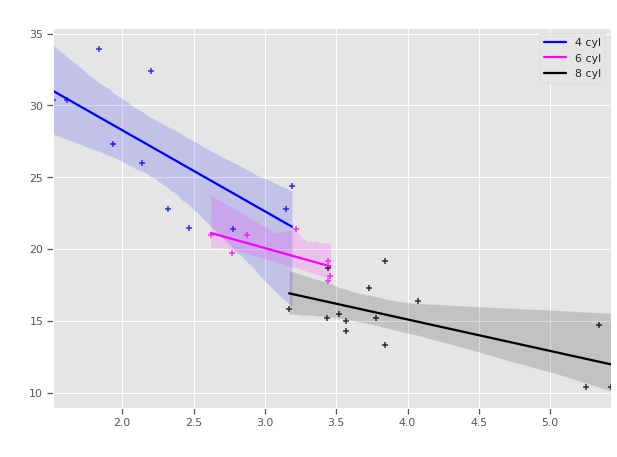

In [33]:
# regression plot using seaborn:

fig = plt.figure(figsize=(10, 7))
sns.regplot(x=mtcars[mtcars['cyl'] == 4].wt, y=mtcars[mtcars['cyl'] == 4].mpg, color='blue', marker='+')
sns.regplot(x=mtcars[mtcars['cyl'] == 6].wt, y=mtcars[mtcars['cyl'] == 6].mpg, color='magenta', marker='+')
sns.regplot(x=mtcars[mtcars['cyl'] == 8].wt, y=mtcars[mtcars['cyl'] == 8].mpg, color='black', marker='+')

# Legend, title and labels.
plt.legend(labels=['4 cyl', '6 cyl', '8 cyl'])
plt.title('Relationship between Weight & Milage', size=20, color="white")
plt.xlabel('weight', size=18, color="white")
plt.ylabel('Milage (mpg)', size=18, color="white")

Size of the confidence interval for the regression estimate. This will be drawn using translucent bands around the regression line. The confidence interval is estimated using a bootstrap; for large datasets, it may be advisable to avoid that computation by setting this parameter to None. Check the [method of bootstrapping here](https://stats.stackexchange.com/a/44910/67822).

In [0]:
four = mtcars[mtcars['cyl']==4]
six =  mtcars[mtcars['cyl']==6]
eight = mtcars[mtcars['cyl']==8]

In [0]:
# four_fit = np.polyfit(four.wt, four.mpg, 1)
# six_fit  = np.polyfit(six.wt, six.mpg, 1)
# eight_fit = np.polyfit(eight.wt, eight.mpg, 1)

# ax1 = four.plot(kind='scatter', x='wt', y='mpg', color='blue', alpha=0.5, figsize=(10, 7))
# six.plot(kind='scatter', x='wt', y='mpg', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
# eight.plot(kind='scatter', x='wt', y='mpg', color='black', alpha=0.5, figsize=(10 ,7), ax=ax1)
# plt.legend(labels=['4-cyl', '6-cyl', '8-cyl'])
# plt.title('Relationship between cylinders and miles per gallon', size=15)
# plt.xlabel('Weight', size=18)
# plt.ylabel('Milage (mpg)', size=18);

# plt.plot(four.wt, four_fit[0] * four.wt + four_fit[1], color='darkblue', linewidth=2)
# plt.plot(six.wt, six_fit[0] * six.wt + six_fit[1], color='deeppink', linewidth=2)
# plt.plot(eight.wt, eight_fit[0] * eight.wt + eight_fit[1], color='black', linewidth=2)

In [36]:
np.polyfit(four.wt, four.mpg, 1)

array([-5.64702526, 39.57119601])

Text(0, 0.5, 'Milage (mpg)')

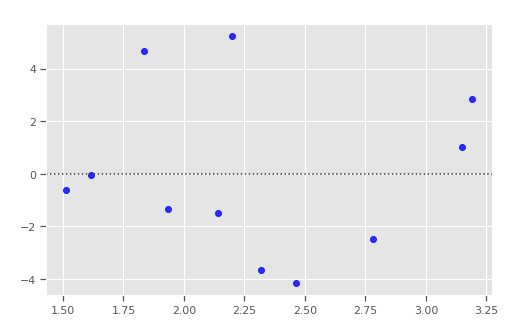

In [37]:
fig = plt.figure(figsize=(8, 5))
sns.set_palette("bright")
sns.residplot(four.wt, four.mpg, color='blue')

plt.title('Residual plot 4 cyl', size=14, color="white")
plt.xlabel('Weight', size=8, color="white")
plt.ylabel('Milage (mpg)', size=8, color="white")

In [0]:
# fig = plt.figure(figsize=(10, 7))
# sns.residplot(six.wt, six.mpg, color='magenta')

# plt.title('Residual plot 6 cyl', size=24)
# plt.xlabel('Weight', size=18)
# plt.ylabel('Milage (mpg)', size=18);

In [0]:
# fig = plt.figure(figsize=(10, 7))
# sns.residplot(eight.wt, eight.mpg, color='black')

# plt.title('Residual plot 8 cyl', size=24)
# plt.xlabel('Weight', size=18)
# plt.ylabel('Milage (mpg)', size=18);

**INTERACTIONS** work with a [syntax](https://www.statsmodels.org/dev/example_formulas.html) mirroring R:

In [40]:
m = ols('mpg ~ wt * qsec', data=mtcars).fit() 
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     46.92
Date:                Fri, 29 May 2020   Prob (F-statistic):           4.78e-11
Time:                        02:33:06   Log-Likelihood:                -73.638
No. Observations:                  32   AIC:                             155.3
Df Residuals:                      28   BIC:                             161.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.1149     29.375     -0.446      0.6

Compare to the R output:

```
> summary(lm('mpg ~ wt * qsec', data=mtcars))

Call:
lm(formula = "mpg ~ wt * qsec", data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0143 -1.9740  0.0877  1.3045  5.3115 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -13.1149    29.3754  -0.446    0.659
wt            5.4988     9.2901   0.592    0.559
qsec          2.7568     1.6292   1.692    0.102
wt:qsec      -0.5897     0.5188  -1.137    0.265

Residual standard error: 2.583 on 28 degrees of freedom
Multiple R-squared:  0.8341,	Adjusted R-squared:  0.8163 
F-statistic: 46.92 on 3 and 28 DF,  p-value: 4.777e-11
```

Here is the syntax for **POLYNOMIAL** regression:

In [41]:
mtcars['wt_square']=mtcars['wt']**2
model = ols('mpg ~ wt + wt_square', data=mtcars).fit()
print(model.summary())
print(model.params)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     65.64
Date:                Fri, 29 May 2020   Prob (F-statistic):           1.71e-11
Time:                        02:33:06   Log-Likelihood:                -75.024
No. Observations:                  32   AIC:                             156.0
Df Residuals:                      29   BIC:                             160.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.9308      4.211     11.856      0.0

Compare to the R output:

```
> summary(lm(mpg ~ poly(wt, 2, raw=T), mtcars))

Call:
lm(formula = mpg ~ poly(wt, 2, raw = T), data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.483 -1.998 -0.773  1.462  6.238 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            49.9308     4.2113  11.856 1.21e-12 ***
poly(wt, 2, raw = T)1 -13.3803     2.5140  -5.322 1.04e-05 ***
poly(wt, 2, raw = T)2   1.1711     0.3594   3.258  0.00286 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.651 on 29 degrees of freedom
Multiple R-squared:  0.8191,	Adjusted R-squared:  0.8066 
F-statistic: 65.64 on 2 and 29 DF,  p-value: 1.715e-11
```

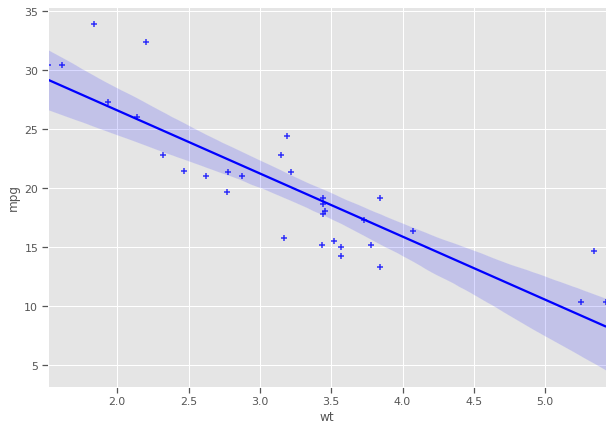

In [42]:
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=mtcars.wt, y=mtcars.mpg, color='blue', marker='+')

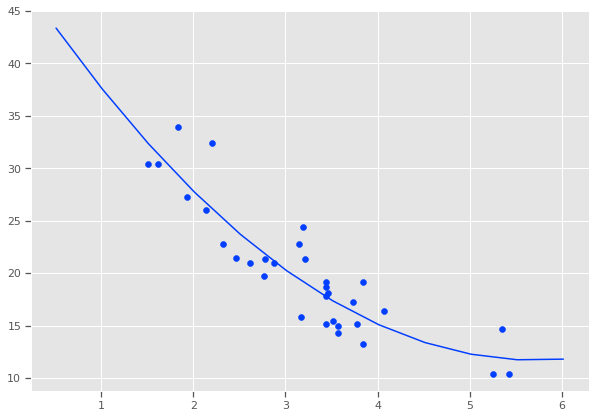

In [43]:
fig = plt.figure(figsize=(10, 7))

plt.scatter(mtcars['wt'], mtcars['mpg'])
x2 = np.arange(min(mtcars['wt']) - 1, max(mtcars['wt']) + 1, .5)
y2 = np.polyval(model.params[::-1], x2)
plt.plot(x2, y2, label="deg=2")

In [44]:
mtcars['wt_square']=mtcars['wt']**2
mtcars['wt_cube']  =mtcars['wt']**3
mtcars['wt_fourth']  =mtcars['wt']**4
modfit = ols('mpg ~ wt + wt_square + wt_cube + wt_fourth', data=mtcars).fit()
print(modfit.summary())
print(modfit.params)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     31.17
Date:                Fri, 29 May 2020   Prob (F-statistic):           9.21e-10
Time:                        02:33:07   Log-Likelihood:                -74.765
No. Observations:                  32   AIC:                             159.5
Df Residuals:                      27   BIC:                             166.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.4558     54.048      0.267      0.7

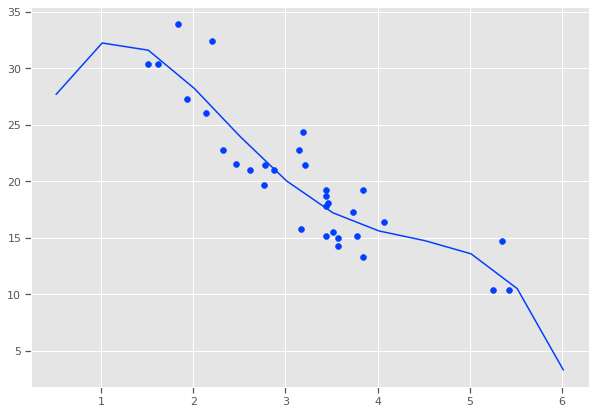

In [45]:
fig = plt.figure(figsize=(10, 7))

plt.scatter(mtcars['wt'], mtcars['mpg'])
x2 = np.arange(min(mtcars['wt']) - 1, max(mtcars['wt']) + 1, .5)
y2 = np.polyval(modfit.params[::-1], x2)
plt.plot(x2, y2, label="deg=4")

The corresponding code in R is:

```
fit <- lm(mpg ~ poly(wt,2, raw=T), mtcars)
plot(mpg ~ wt, mtcars)
lines(sort(mtcars$wt), fitted(fit)[order(mtcars$wt)], col='red', type='b') 
```

**LOGISTIC REGRESSION:**

There are other ways of doing logistic regression, as explained [here](http://www.science.smith.edu/~jcrouser/SDS293/labs/2016/lab4/Lab%204%20-%20Logistic%20Regression%20in%20Python.pdf).

In [46]:
url = "https://raw.githubusercontent.com/RInterested/DATASETS/gh-pages/admissions.csv"
contents = requests.get(url).content
admissions = pd.read_csv(io.StringIO(contents.decode('utf-8')))

admissions.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [47]:
# Rank is a categorical variable... So let's indicate that...
print(admissions.dtypes)                                    # The way it is without manipulation is a numerical variable: int64
print(str(admissions))                                      # 400 rows and 4 columns.
print(admissions.describe())
dummy = pd.get_dummies(admissions['rank'], prefix='rank')   # We can split the variable "rank" in thee columns. The rank 1 will be the baseline 0 in the implicit model matrix, as in R.
X_no_intercept = admissions[['admit', 'gre', 'gpa']].join(dummy[dummy.columns[1:]]) # The command dummy.columns[1:] leaves the first column out of the model matrix.
print(X_no_intercept.head())

admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object
     admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
..     ...  ...   ...   ...
395      0  620  4.00     2
396      0  560  3.04     3
397      0  460  2.63     2
398      0  700  3.65     2
399      0  600  3.89     3

[400 rows x 4 columns]
            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000
   admit  gre   gpa  rank_2  rank_3  rank_4
0      0  380  3.61       0       1  

In [48]:
MM = sm.add_constant(X_no_intercept[X_no_intercept.columns[1:]])     # We add an intercept to complete the model matrix. We leave column 0 with the y variable 'admit' out.
print(MM.head())                                                     # This is the head beginning of the 400 row model matrix.

   const  gre   gpa  rank_2  rank_3  rank_4
0    1.0  380  3.61       0       1       0
1    1.0  660  3.67       0       1       0
2    1.0  800  4.00       0       0       0
3    1.0  640  3.19       0       0       1
4    1.0  520  2.93       0       0       1


In [49]:
mylogit = sm.Logit(admissions['admit'], MM).fit()                    # This is the actual logistic regression.
print(mylogit.summary())

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Fri, 29 May 2020   Pseudo R-squ.:                 0.08292
Time:                        02:33:08   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9900      1.140     -3.500      0.000      -6.224      -1.756
gre            0.0023      0.

Which is the same as in R:
```
> mylogit <- glm(admit ~ gre + gpa + rank, data = admissions, family = "binomial")
> summary(mylogit)

Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = admissions)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank2       -0.675443   0.316490  -2.134 0.032829 *  
rank3       -1.340204   0.345306  -3.881 0.000104 ***
rank4       -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4
```

In [50]:
print(dir(mylogit))             # These are all the retrievable values out of the mylogit.

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_endog_name', '_get_robustcov_results', 'aic', 'bic', 'bse', 'conf_int', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_margeff', 'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue', 'load', 'mle_retvals', 'mle_settings', 'model', 'nobs', 'normalized_cov_params', 'params', 'pred_table', 'predict', 'prsquared', 'pvalues', 'remove_data', 'resid_dev', 'resid_generalized', 'resid_pearson', 'resid_response', 'save', 'scale', 'set_null_options', 'summary', 'summary2', 't_test', 't_test_pairwise', 'tvalues', 'use_t', 'wald_test', 'wald_test_terms']


The exp{Intercept} gives us the odds of being accepted with rank 1 and all the other variable at zero.
The exp{params} gives us the odds ratio where the numerator is the exp{intercept}. See [here](http://rinterested.github.io/statistics/logistic_regression.html).

In [51]:
print(np.exp(mylogit.params),np.exp(mylogit.conf_int()))

const     0.018500
gre       1.002267
gpa       2.234545
rank_2    0.508931
rank_3    0.261792
rank_4    0.211938
dtype: float64                0         1
const   0.001981  0.172783
gre     1.000120  1.004418
gpa     1.166122  4.281877
rank_2  0.273692  0.946358
rank_3  0.133055  0.515089
rank_4  0.093443  0.480692


Compare to the R output:

```
> exp(cbind(coef(mylogit), confint(mylogit)))
Waiting for profiling to be done...
                            2.5 %    97.5 %
(Intercept) 0.0185001 0.001889165 0.1665354
gre         1.0022670 1.000137602 1.0044457
gpa         2.2345448 1.173858216 4.3238349
rank2       0.5089310 0.272289674 0.9448343
rank3       0.2617923 0.131641717 0.5115181
rank4       0.2119375 0.090715546 0.4706961
```

In [52]:
# Predicting in-sample:
mylogit.predict(MM)

0      0.172627
1      0.292175
2      0.738408
3      0.178385
4      0.118354
         ...   
395    0.488670
396    0.165504
397    0.181062
398    0.463667
399    0.300731
Length: 400, dtype: float64

In [53]:
# Let's look at the first example:
print(MM.iloc[:1])
mylogit.predict(MM.iloc[:1])

   const  gre   gpa  rank_2  rank_3  rank_4
0    1.0  380  3.61       0       1       0


0    0.172627
dtype: float64

In [54]:
# What about predicting out of sample...
dat = {'const': [1,2], 'gre': [390,388], 'gpa': [3.58,3.51], 'rank_2':[0,1], 'rank_3': [0,0], 'rank_4': [1,0]} # These examples are rank 4 and rank 2, respectively.
df = pd.DataFrame(dat)
mylogit.predict(df)

0    0.144320
1    0.007001
dtype: float64

In [55]:
# Is the odds really the value for rank 1 and all else at zero?
dat = {'const': [1], 'gre': [0], 'gpa': [0], 'rank_2':[0], 'rank_3': [0], 'rank_4': [0]} # This example is of rank 4.
df = pd.DataFrame(dat)
mylogit.predict(df) # This seems to confirm it with some numerical imprecision:

0    0.018164
dtype: float64

The following is from [this post](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8).

In [56]:
url = "https://raw.githubusercontent.com/RInterested/DATASETS/gh-pages/banking.csv"
contents = requests.get(url).content
data = pd.read_csv(io.StringIO(contents.decode('utf-8')))
print(data.shape)
data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [57]:
print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.

In [58]:
print(data['education'].unique())
data['education']=np.where(data['education'] == 'basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] == 'basic.4y', 'Basic', data['education'])
data['education'].unique()

['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']


array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [59]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

> Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11.

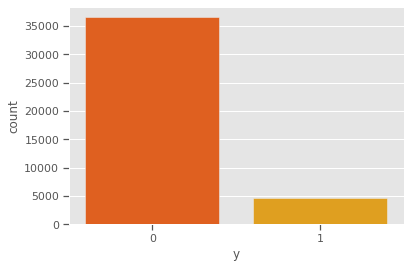

In [60]:
sns.countplot(x='y', data=data, palette='autumn')

In [61]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


Text(0, 0.5, 'Frequency of Purchase')

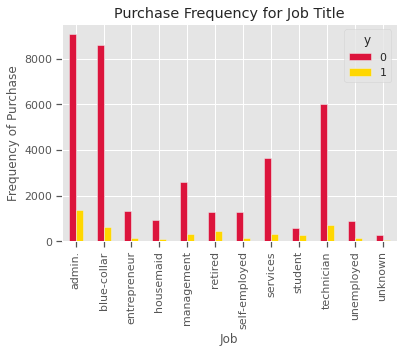

In [62]:
pd.crosstab(data.job,data.y).plot(kind='bar',color=['crimson', 'gold'])
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Proportion of Customers')

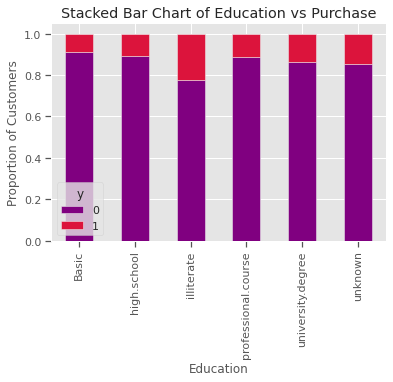

In [63]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['purple','crimson'])
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of Purchase')

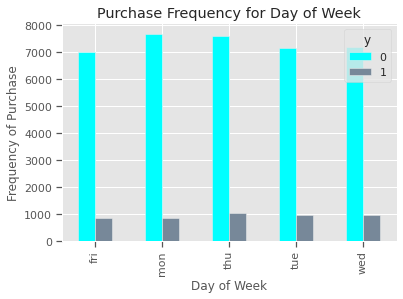

In [64]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar', color=['aqua','lightslategray'])
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

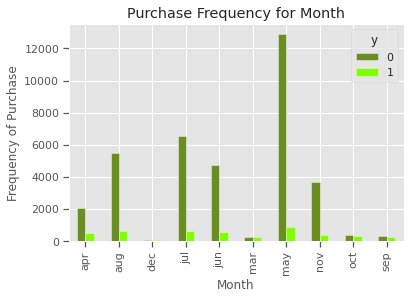

In [65]:
pd.crosstab(data.month,data.y).plot(kind='bar', color=['olivedrab','chartreuse'])
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Text(0, 0.5, 'Frequency')

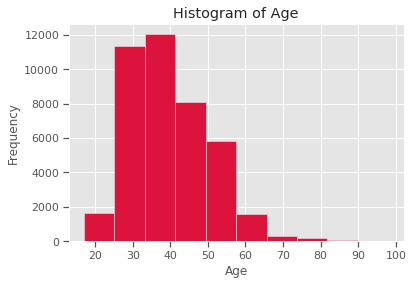

In [66]:
data.age.hist(color='crimson')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency of Purchase')

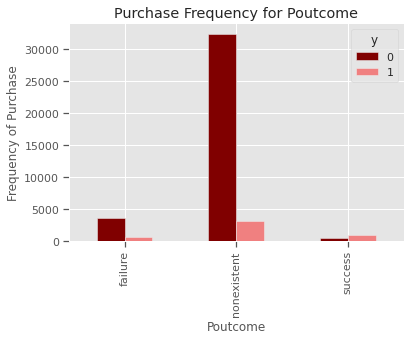

In [67]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar', color=['maroon','lightcoral'])
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

Create dummy variables:

In [68]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

Over-sampling using [SMOTE](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#Oversampling_techniques_for_classification_problems):

> Take a sample from the dataset, and consider its k nearest neighbors (in feature space). To create a synthetic data point, take the vector between one of those k neighbors, and the current data point. Multiply this vector by a random number x which lies between 0, and 1. Add this to the current data point to create the new, synthetic data point.

In [0]:
%%capture  --no-display 
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

>Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [0]:
%%capture  --no-display 

data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

>The RFE has helped us select the following features: “euribor3m”, “job_blue-collar”, “job_housemaid”, “marital_unknown”, “education_illiterate”, “default_no”, “default_unknown”, “contact_cellular”, “contact_telephone”, “month_apr”, “month_aug”, “month_dec”, “month_jul”, “month_jun”, “month_mar”, “month_may”, “month_nov”, “month_oct”, “poutcome_failure”, “poutcome_success”.

In [0]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

**Implementing the model:**

In [72]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.545904
         Iterations: 35
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.212     
Dependent Variable:      y                    AIC:                  55868.4619
Date:                    2020-05-29 02:33     BIC:                  56045.3060
No. Observations:        51134                Log-Likelihood:       -27914.   
Df Model:                19                   LL-Null:              -35443.   
Df Residuals:            51114                LLR p-value:          0.0000    
Converged:               0.0000               Scale:                1.0000    
No. Iterations:          35.0000                                              
------------------------------------------------------------------------------
                      Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------
euribor3m         

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them.

In [73]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.555890
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   y                 AIC:               56881.7793
Date:                 2020-05-29 02:33  BIC:               57023.2546
No. Observations:     51134             Log-Likelihood:    -28425.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.4488   0.0074 -60.6838 0.0000 -0.4632 -0.4343
job_blue-collar 

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6124 1542]
 [2506 5169]]


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7666
           1       0.77      0.67      0.72      7675

    accuracy                           0.74     15341
   macro avg       0.74      0.74      0.74     15341
weighted avg       0.74      0.74      0.74     15341



Interpretation: Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 74% of the customer’s preferred term deposits that were promoted.

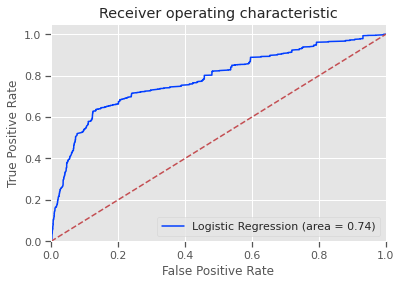

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")